In [ ]:
from app_store_scraper import AppStore
import pandas as pd

# Initialize the AppStore scraper for the specific app
app_id = '785385147'  # Replace with your app's actual ID
lazada = AppStore(country='sg', app_id=app_id,app_name='lazada')

# Fetch the reviews
lazada.review(how_many=100000)  # Adjust limit as necessary

In [19]:
lazada.reviews

[{'date': datetime.datetime(2021, 3, 19, 1, 9, 6),
  'developerResponse': {'id': 24837237,
   'body': 'The Lazada team would like to thank you for your trust and confidence in using our online shopping platform. We promise to continuously improve on our system to serve you better in the future. If you experience any dissatisfaction during your shopping experience, please contact us directly via the Lazada in-app help centre.',
   'modified': '2021-09-01T01:32:46Z'},
  'review': 'Have been using Lazada & Redmart for quite a few years. Product variety and logistics handling are surely very important, and I have to say you have been doing a good job, but one point I want to raise is the user interface, which is equally important, if not, more. Whenever I do grocery shopping I go for Redmart for sure, but when it comes to other types of shopping, I initially search on Lazada, but eventually would give up for Shopee. Different from any other e-commerce web, the lazada product display page d

In [24]:
import numpy as np
import pandas as pd

lazadadf = pd.DataFrame(np.array(lazada.reviews),columns=['review'])
lazadadf2 = lazadadf.join(pd.DataFrame(lazadadf.pop('review').tolist()))
lazadadf2.head()

,date,developerResponse,review,rating,isEdited,title,userName
0,2021-03-19 01:09:06,"{'id': 24837237, 'body': 'The Lazada team woul...",Have been using Lazada & Redmart for quite a f...,5,False,User experience n feedback,fionayolip
1,2021-09-06 01:29:08,"{'id': 24972282, 'body': 'Hey,SriMahakali! Tha...",The app for the online purchase is good and ef...,5,False,Shopping Experience with LAZADA,SriMahakali
2,2024-05-13 06:19:48,"{'id': 43911525, 'body': 'Lazada xin lỗi vì sự...","The app was alright, however, some merchants a...",1,False,The customer service for dispute was so bad,Michelle_JJ
3,2022-06-20 05:21:31,"{'id': 30426482, 'body': 'Hi, kspeeder We sinc...","The wallet is absolutely pointless, why put mo...",1,True,Bad ads and pointless wallet,kspeeder
4,2024-04-05 04:08:17,"{'id': 43111766, 'body': 'Hello 1Ace95, We are...",I had been using Lazada for few years and had ...,5,False,I enjoy buying stuff on Lazada 😍,1Ace95


In [26]:
lazadadf2.describe()

,date,rating
count,5491,5491.000000
mean,2021-04-11 12:39:54.850118400,3.792205
min,2014-01-15 03:09:54,1.000000
25%,2019-11-10 10:27:36,2.000000
50%,2021-10-18 16:27:06,5.000000
75%,2022-05-30 04:09:40.500000,5.000000
max,2024-10-23 10:46:51,5.000000
std,NaN,1.710138


In [63]:
lazadadf2.to_csv('lazada-app-reviews.csv',index=False)

# Starting Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('lazada-app-reviews.csv')

In [4]:
df.date.max()

'2024-10-23 10:46:51'

In [2]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               5491 non-null   datetime64[ns]
 1   developerResponse  1628 non-null   object        
 2   review             5491 non-null   object        
 3   rating             5491 non-null   int64         
 4   isEdited           5491 non-null   bool          
 5   title              5491 non-null   object        
 6   userName           5491 non-null   object        
 7   year               5491 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 305.8+ KB


In [3]:
df.rating.value_counts()

rating
5    3432
1    1308
4     322
2     220
3     209
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

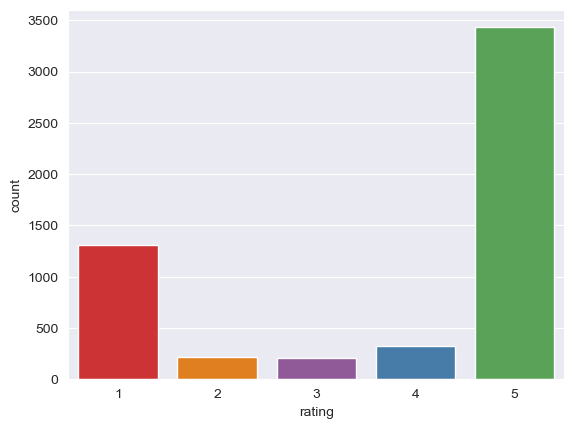

In [4]:
sns.set_style("darkgrid")
sns.countplot(data=df,x='rating', hue='rating',palette=['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] ,legend=False)

# Time Analysis for years

In [5]:
df['year'] = df['date'].dt.year

In [6]:
df.year.value_counts()

year
2022    1541
2021    1505
2019     817
2023     389
2020     359
2024     266
2018     250
2017     139
2015     111
2016     102
2014      12
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='count'>

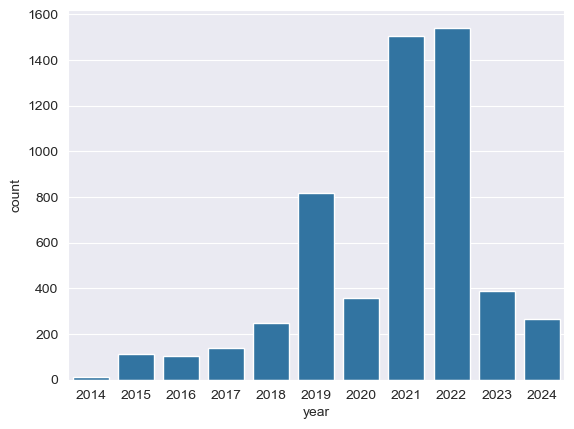

In [7]:
sns.countplot(df,x='year') 

In [136]:
rating_count = df.groupby(['year', 'rating']).size().reset_index().rename(columns={0:'count'})
rating_count

,year,rating,count
0,2014,1,3
1,2014,2,1
2,2014,3,1
3,2014,4,1
4,2014,5,6
5,2015,1,27
6,2015,2,5
7,2015,3,4
8,2015,4,12
9,2015,5,63


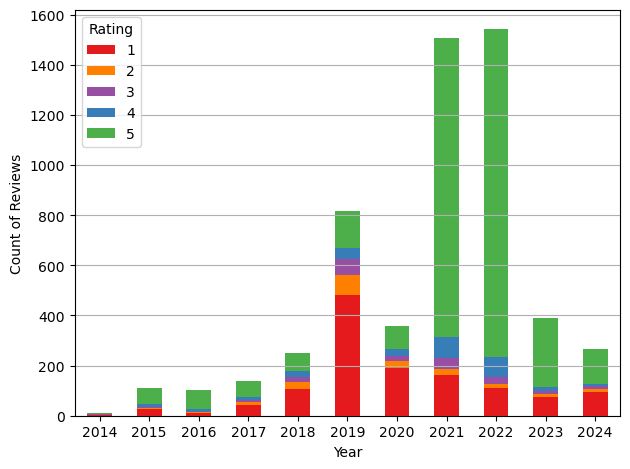

In [137]:
# Pivot the data so that we have a column for each rating
colors = ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] 
rating_pivot = rating_count.pivot(index='year', columns='rating', values='count')

# Plot the stacked bar chart
ax = rating_pivot.plot(kind='bar', stacked=True,color=colors)

plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add numbers on top of the bars
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fmt='%d')

plt.tight_layout()
plt.grid(axis = 'y')

# Show the plot
plt.show()

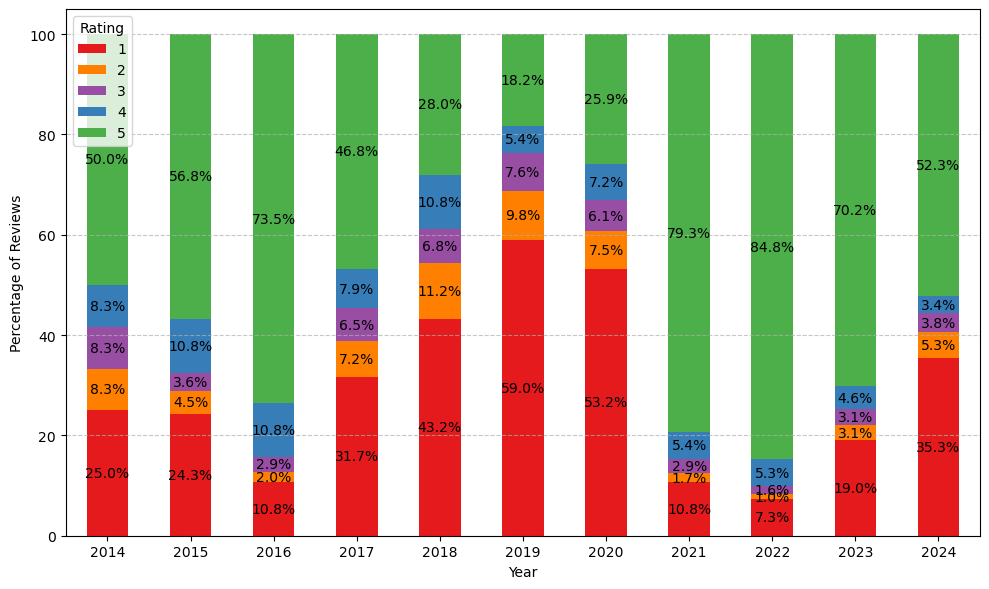

In [138]:
import matplotlib.pyplot as plt

colors = ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] 
# Calculate the percentage for each rating within each year and reset index for alignment
rating_count['percentage'] = rating_count.groupby('year')['count'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)

# Pivot the data to prepare for plotting percentages
rating_pivot = rating_count.pivot(index='year', columns='rating', values='percentage')

# Plot the stacked bar chart with percentage values
ax = rating_pivot.plot(kind='bar', stacked=True, figsize=(10, 6),color=colors)

plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')  # Display as percentages

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Sentiment Analysis here as well similar graph as above but instead it shows very unsatisfied, unsatisfied etc, put together in the slides to show that people are becoming more unhappy with the app, complemented by the rating

In [158]:
df

,date,developerResponse,review,rating,isEdited,title,userName,year
0,2021-03-19 01:09:06,"{'id': 24837237, 'body': 'The Lazada team woul...",Have been using Lazada & Redmart for quite a f...,5,False,User experience n feedback,fionayolip,2021
1,2021-09-06 01:29:08,"{'id': 24972282, 'body': ""Hey,SriMahakali! Tha...",The app for the online purchase is good and ef...,5,False,Shopping Experience with LAZADA,SriMahakali,2021
2,2024-05-13 06:19:48,"{'id': 43911525, 'body': 'Lazada xin lỗi vì sự...","The app was alright, however, some merchants a...",1,False,The customer service for dispute was so bad,Michelle_JJ,2024
3,2022-06-20 05:21:31,"{'id': 30426482, 'body': 'Hi, kspeeder We sinc...","The wallet is absolutely pointless, why put mo...",1,True,Bad ads and pointless wallet,kspeeder,2022
4,2024-04-05 04:08:17,"{'id': 43111766, 'body': 'Hello 1Ace95, We are...",I had been using Lazada for few years and had ...,5,False,I enjoy buying stuff on Lazada 😍,1Ace95,2024
...,...,...,...,...,...,...,...,...
5486,2016-05-13 16:35:15,NaN,Made an order with 2 items but free shipping w...,1,False,Never buy from Lazada!,Mrs Khoo,2016
5487,2015-06-22 19:38:24,NaN,Why does this app always disrupt my videos? On...,5,False,Annoying hate it,Mcc_mcc,2015
5488,2015-08-04 11:10:50,NaN,I can't do anything without being redirected t...,1,False,Crappy advertising,joeypohie,2015
5489,2015-07-31 13:08:56,NaN,This bloody app keeps appearing when i am surf...,1,False,Lazada is a lousy app,Samtsen65,2015


In [159]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Valentino
[nltk_data]     Ong\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [160]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [162]:
review_list = df['review'].to_list()
neg_list = []
neu_list = []
pos_list = []
compound_list = []
for review in review_list:
    scores = analyzer.polarity_scores(review)
    neg_list.append(scores['neg'])
    neu_list.append(scores['neu'])
    pos_list.append(scores['pos'])
    compound_list.append(scores['compound'])

df['neg'] = neg_list
df['neu'] = neu_list
df['pos'] = pos_list
df['compound'] = compound_list

df.head(2)

,date,developerResponse,review,rating,isEdited,title,userName,year,neg,neu,pos,compound
0,2021-03-19 01:09:06,"{'id': 24837237, 'body': 'The Lazada team woul...",Have been using Lazada & Redmart for quite a f...,5,False,User experience n feedback,fionayolip,2021,0.00,0.796,0.204,0.9934
1,2021-09-06 01:29:08,"{'id': 24972282, 'body': ""Hey,SriMahakali! Tha...",The app for the online purchase is good and ef...,5,False,Shopping Experience with LAZADA,SriMahakali,2021,0.07,0.699,0.232,0.9867


In [163]:
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else: return 'neutral'

df['sentiment'] = df['compound'].apply(classify_sentiment)
df['sentiment'].value_counts()

sentiment
positive    3486
neutral     1014
negative     991
Name: count, dtype: int64

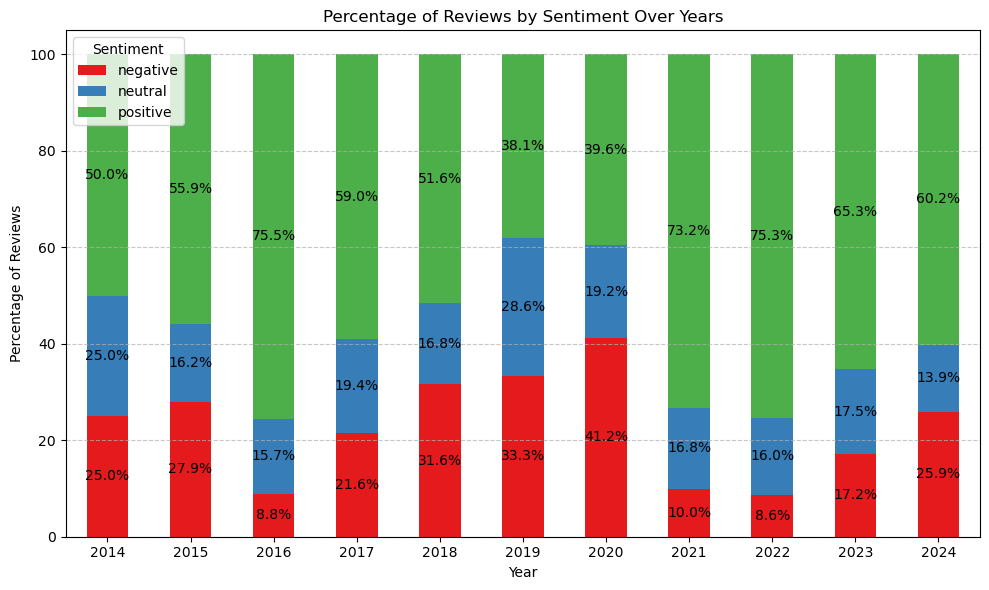

In [165]:
import matplotlib.pyplot as plt

# Example colors for sentiments: negative (red), positive (green), neutral (blue)
colors = ['#e41a1c', '#377eb8', '#4daf4a']  

# Calculate the percentage for each sentiment within each year and reset index for alignment
df['count'] = 1  # Add a count column for each review
sentiment_count = df.groupby(['year', 'sentiment']).count().reset_index()

# Calculate the percentage for each sentiment within each year
sentiment_count['percentage'] = sentiment_count.groupby('year')['count'].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)

# Pivot the data to prepare for plotting percentages
sentiment_pivot = sentiment_count.pivot(index='year', columns='sentiment', values='percentage')

# Plot the stacked bar chart with percentage values for sentiments
ax = sentiment_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Reviews')
plt.title('Percentage of Reviews by Sentiment Over Years')
plt.xticks(rotation=0)
plt.legend(title='Sentiment', loc='upper left')
plt.tight_layout()

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%.1f%%')  # Display as percentages

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Time Analysis for 2024

In [140]:
df_2024 = df[df['year'] == 2024].copy()
df_2024['month'] = df_2024.date.dt.month
df_2024.head()

,date,developerResponse,review,rating,isEdited,title,userName,year,month
2,2024-05-13 06:19:48,"{'id': 43911525, 'body': 'Lazada xin lỗi vì sự...","The app was alright, however, some merchants a...",1,False,The customer service for dispute was so bad,Michelle_JJ,2024,5
4,2024-04-05 04:08:17,"{'id': 43111766, 'body': 'Hello 1Ace95, We are...",I had been using Lazada for few years and had ...,5,False,I enjoy buying stuff on Lazada 😍,1Ace95,2024,4
12,2024-08-20 06:10:51,NaN,"Ever since the bought over by A***, Lazada pla...",2,False,Products and Customer Service,Agifrures,2024,8
20,2024-10-22 07:53:06,"{'id': 47677372, 'body': ""We appreciate your w...",I’ve made many purchases on Lazada and am extr...,5,False,No other than Lazada👍🏼,Lustful_69,2024,10
21,2024-09-11 05:07:25,NaN,"Highly unhelpful, unscrupulous customer servic...",1,False,BUYER BEWARE: extremely poor customer service,SD707,2024,9


In [141]:
rating_count = df_2024.groupby(['month', 'rating']).size().reset_index().rename(columns={0:'count'})
rating_count

,month,rating,count
0,1,1,8
1,1,2,1
2,1,3,3
3,1,4,1
4,1,5,16
5,2,1,6
6,2,2,1
7,2,5,14
8,3,1,9
9,3,3,2


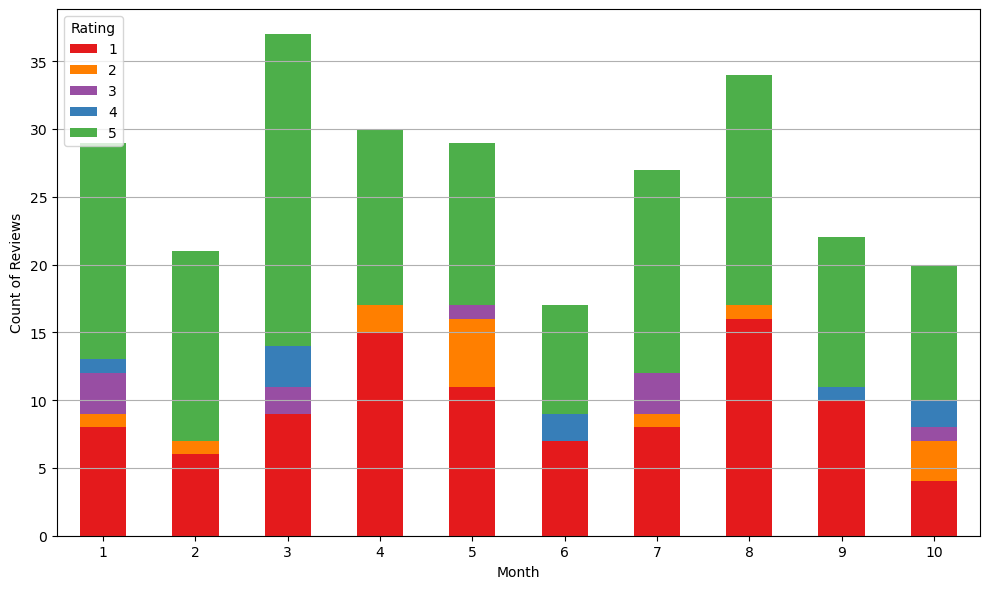

In [157]:
# Pivot the data so that we have a column for each rating
colors = ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'] 
rating_pivot = rating_count.pivot(index='month', columns='rating', values='count')

# Plot the stacked bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))
rating_pivot.plot(kind='bar', stacked=True, color=colors,ax=ax1)

plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add numbers on top of the bars
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fmt='%d')

plt.tight_layout()
plt.grid(axis = 'y')

# Show the plot
plt.show()

<Axes: xlabel='rating', ylabel='count'>

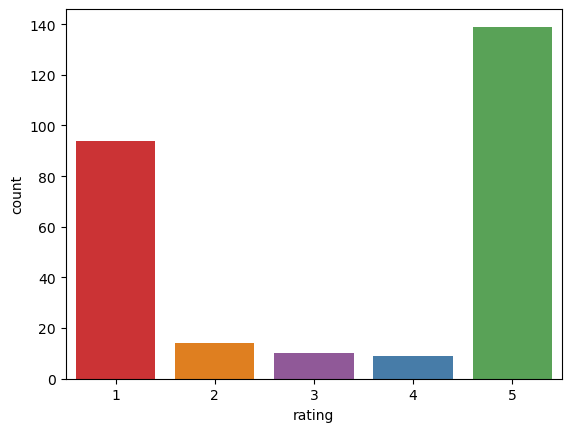

In [143]:
sns.countplot(data=df_2024,x='rating', hue='rating',palette= ['#e41a1c', '#ff7f00', '#984ea3','#377eb8', '#4daf4a'],legend=False)

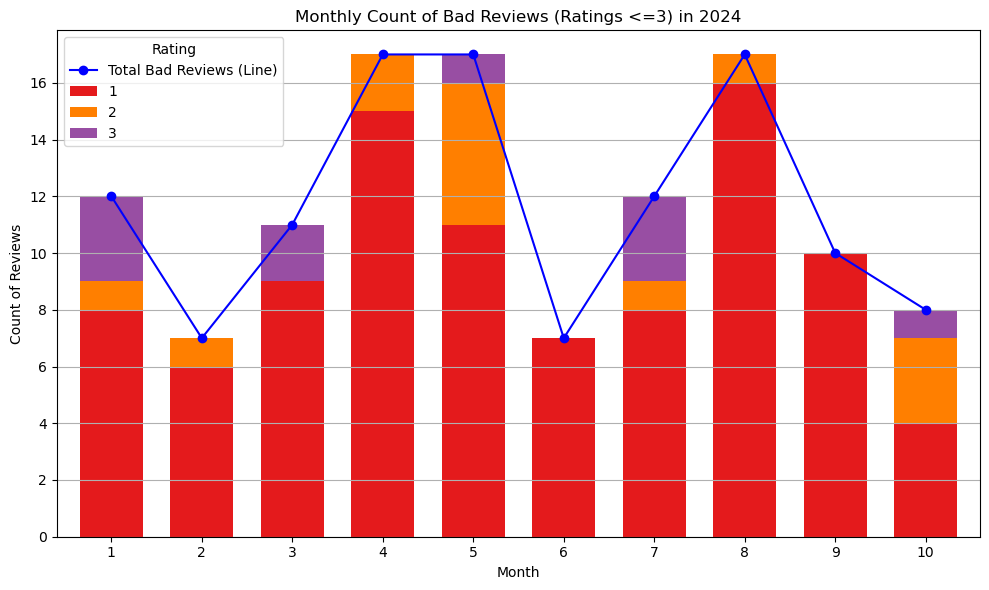

In [168]:
# Filter for bad reviews with rating 3 or lower
df_1_to_3_star = df_2024[df_2024['rating'] <= 3]

# Count the number of reviews per month and rating for the stacked bar chart
rating_pivot = pd.crosstab(df_1_to_3_star['month'], df_1_to_3_star['rating'])

# Count the number of reviews per month for the line chart
review_counts = df_1_to_3_star['month'].value_counts().sort_index()
review_counts.index = review_counts.index.astype(str)

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stacked bar chart
colors = ['#e41a1c', '#ff7f00', '#984ea3']  # Colors for ratings 1, 2, and 3
rating_pivot.plot(kind='bar', stacked=True, color=colors, ax=ax1, width=0.7)

# Plot the line chart on the same axis
ax1.plot(review_counts.index, review_counts.values, color='blue', marker='o', linestyle='-', label='Total Bad Reviews (Line)')

# Set labels and title
ax1.set_title('Monthly Count of Bad Reviews (Ratings <=3) in 2024')
ax1.set_xlabel('Month')
ax1.set_ylabel('Count of Reviews')

# Rotate the x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Legends
ax1.legend(title='Rating', loc='upper left')

# Adjust layout and add gridlines
plt.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()


In [49]:
df_past_3_months = df_1_to_3_star[df_1_to_3_star['month'] >= 8].copy()
df_past_3_months

,date,developerResponse,review,rating,isEdited,title,userName,year,month
12,2024-08-20 06:10:51,NaN,"Ever since the bought over by A***, Lazada pla...",2,False,Products and Customer Service,Agifrures,2024,8
21,2024-09-11 05:07:25,NaN,"Highly unhelpful, unscrupulous customer servic...",1,False,BUYER BEWARE: extremely poor customer service,SD707,2024,9
23,2024-08-14 13:45:25,"{'id': 26514535, 'body': 'Hi Millie1337, Thank...",1. Company allows sellers to send broadcast to...,1,True,Scamming - unethical practises,Mellie1337,2024,8
89,2024-08-13 02:01:42,NaN,Lazada is collaborating with seller registered...,1,False,Poor customer service support and system,zZzNo.oBzZz,2024,8
171,2024-09-05 17:20:44,"{'id': 41269452, 'body': 'At Lazada we strive ...",Seriously I don’t know what is wrong with laza...,1,True,No more free shipping voucher to claim at vouc...,Jolynnteo,2024,9
299,2024-10-03 04:42:13,"{'id': 47229479, 'body': ""We appreciate your f...",Now requires two clicks to access the voucher ...,2,False,Poor UI designed to prioritise ads over good u...,dqwrtx,2024,10
391,2024-08-16 14:51:59,"{'id': 41347282, 'body': 'Thank you for your v...","Hi Lazada App Team, As an avid user of the Laz...",1,True,Too many in-app pop-ups in late 2023,ipad-crazy,2024,8
417,2024-08-02 01:54:01,NaN,Accidentally placed a wrong order and immediat...,1,False,Worst customer service,dreamyyxx,2024,8
443,2024-08-23 05:33:33,NaN,Lazada Singapore service is extremely bad. The...,1,False,The worst Lazada app and service,Daisy Ngoc Vo,2024,8
456,2024-08-15 07:50:53,NaN,"Was a very good shopping site at first, items ...",1,False,"not recommended,scam",Mellow8787,2024,8


In [50]:
df_past_3_months_bad_rating = df_past_3_months[df_past_3_months['rating'] <= 3].copy()
df_past_3_months_bad_rating.rating.value_counts()

rating
1    30
2     4
3     1
Name: count, dtype: int64

In [51]:
rating_count = df_past_3_months_bad_rating.groupby(['month', 'rating']).size().reset_index().rename(columns={0:'count'})
rating_count

,month,rating,count
0,8,1,16
1,8,2,1
2,9,1,10
3,10,1,4
4,10,2,3
5,10,3,1


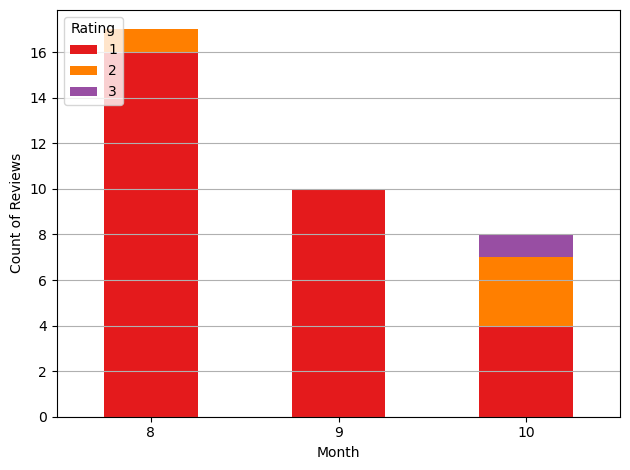

In [52]:
# Pivot the data so that we have a column for each rating
colors = colors = ['#e41a1c', '#ff7f00', '#984ea3']
rating_pivot = rating_count.pivot(index='month', columns='rating', values='count')

# Plot the stacked bar chart
ax = rating_pivot.plot(kind='bar', stacked=True,color=colors)

plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=0)
plt.legend(title='Rating', loc='upper left')
plt.tight_layout()

# Add numbers on top of the bars
# for container in ax.containers:
#     ax.bar_label(container, label_type='center', fmt='%d')

plt.tight_layout()
plt.grid(axis = 'y')

# Show the plot
plt.show()

# Preprocessing for word cloud

In [53]:
df_2024.isna().sum()

date                   0
developerResponse    103
review                 0
rating                 0
isEdited               0
title                  0
userName               0
year                   0
month                  0
dtype: int64

In [54]:
df_2024.iloc[3].review

"I’ve made many purchases on Lazada and am extremely impressed by the entire experience, from browsing to delivery. Lazada’s consumer protection policy gave me peace of mind throughout the process, ensuring that my rights as a buyer were safeguarded. The platform's user-friendly interface made it easy to navigate, select products, and check out. The delivery was fast and hassle-free, with constant updates that let me track my order every step of the way. Lazada’s seamless process and commitment to customer satisfaction have definitely earned my trust. Highly recommended!"

## Converting to small letters and removing punctuations

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

def cleanPunc(sentence): 
    # Only clean specific punctuation marks, but keep emojis and other unicode characters
    cleaned = re.sub(r'[?|!|\'|"|#]', r'', sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n", " ")
    return cleaned

df_2024['review'] = df_2024['review'].str.lower()
df_2024['review'] = df_2024['review'].apply(cleanPunc)
df_2024.iloc[3].review

'i’ve made many purchases on lazada and am extremely impressed by the entire experience  from browsing to delivery  lazada’s consumer protection policy gave me peace of mind throughout the process  ensuring that my rights as a buyer were safeguarded  the platforms user-friendly interface made it easy to navigate  select products  and check out  the delivery was fast and hassle-free  with constant updates that let me track my order every step of the way  lazada’s seamless process and commitment to customer satisfaction have definitely earned my trust  highly recommended'

## Removing stopwords

In [56]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','lazada','app','1','2','3','4','5','6','7','8','9','10','shopee','even'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df_2024['review'] = df_2024['review'].apply(removeStopWords)
df_2024.iloc[3].review

'  made many purchases     extremely impressed   entire experience   browsing  delivery    consumer protection policy gave  peace  mind throughout  process  ensuring   rights   buyer  safeguarded   platforms user-friendly interface made  easy  navigate  select products   check    delivery  fast  hassle-free   constant updates  let  track  order every step   way    seamless process  commitment  customer satisfaction  definitely earned  trust  highly recommended'

## Spacy Lemmatizer

In [57]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define a function to remove stopwords and lemmatize using spaCy
def spacy_lemmatizer(sentence):
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Lemmatize and remove stopwords
    lemmatized_sentence = " ".join([token.lemma_ for token in doc if not token.is_punct and not token.is_space and token.lemma_.strip()])
    
    return lemmatized_sentence.strip()

# Apply the function to the 'review' column
df_2024['review'] = df_2024['review'].apply(spacy_lemmatizer)

# Check the result for the 5th review
df_2024.iloc[3].review

'make many purchase extremely impressed entire experience browse delivery consumer protection policy give peace mind throughout process ensure right buyer safeguard platform user friendly interface make easy navigate select product check delivery fast hassle free constant update let track order every step way seamless process commitment customer satisfaction definitely earn trust highly recommend'

In [58]:
df_2024.to_excel("2024_appleStore_review_cleaned_data.xlsx",index=False)

# Creating word cloud

## Analysis on review with rating 1

In [6]:
import pandas as pd
df_2024 = pd.read_excel("2024_appleStore_review_cleaned_data.xlsx")

In [7]:
rating_1 = df_2024[df_2024['rating'] == 1]
rating_1

,date,developerResponse,review,rating,isEdited,title,userName,year,month
0,2024-05-13 06:19:48,"{'id': 43911525, 'body': 'Lazada xin lỗi vì sự...",alright merchant bad customer service helpful ...,1,False,The customer service for dispute was so bad,Michelle_JJ,2024,5
4,2024-09-11 05:07:25,NaN,highly unhelpful unscrupulous customer service...,1,False,BUYER BEWARE: extremely poor customer service,SD707,2024,9
5,2024-08-14 13:45:25,"{'id': 26514535, 'body': 'Hi Millie1337, Thank...",company allow seller send broadcast people fol...,1,True,Scamming - unethical practises,Mellie1337,2024,8
6,2024-02-19 09:01:57,"{'id': 42100260, 'body': 'We appreciate your f...",add stock item wishlist hope get notification ...,1,False,No notification for back in stock items.,小小cccc,2024,2
8,2024-04-16 16:24:24,"{'id': 43343991, 'body': ""At Lazada we strive ...",get refund due seller fault difficult troubles...,1,False,Refund,grangger,2024,4
...,...,...,...,...,...,...,...,...,...
259,2024-07-21 04:00:33,"{'id': 27958244, 'body': 'We appreciate all th...",customer 10yr payment risk scan feature preven...,1,True,Payment risk scanning not good,Rossonerrro,2024,7
260,2024-06-25 15:48:18,NaN,customer service seem genuinely helpful pls le...,1,False,Poor customer service,Tieguanyincha,2024,6
261,2024-06-15 04:05:36,"{'id': 44633376, 'body': 'Lazada xin lỗi vì sự...",help seller side promise funny always lie cust...,1,False,useless and unfair platform must boycott,无名示o0o,2024,6
263,2024-05-09 05:38:42,"{'id': 43830150, 'body': 'Lazada xin lỗi vì sự...",order pay 5th 2024 17am guarantee 48hr deliver...,1,False,Bad service. Non delivery of item,Fatkoala,2024,5


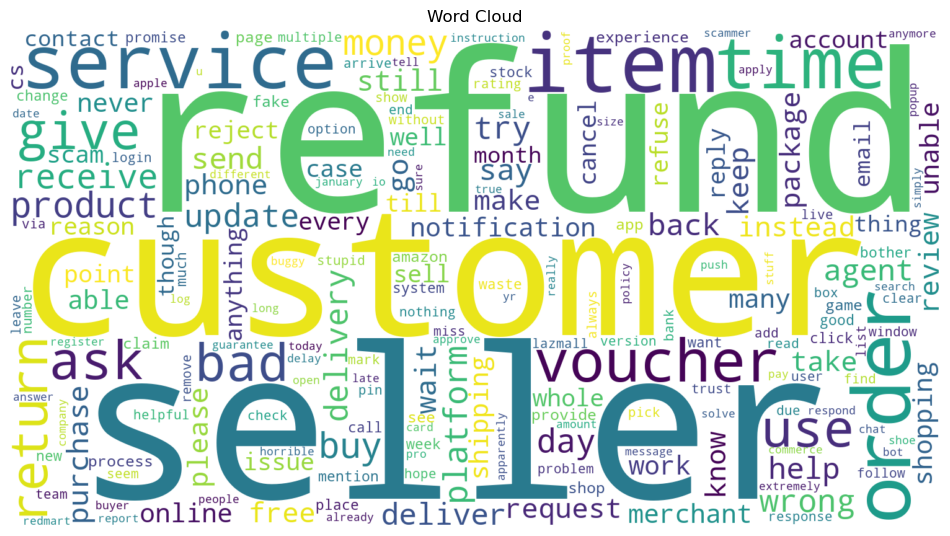

In [9]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_1['review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                      width=1500, height=800).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [94]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_1['review'])))

# Print the word counts
print(word_counts)

Counter({'refund': 49, 'seller': 45, 'customer': 41, 'item': 36, 'order': 35, 'service': 31, 'time': 28, 'get': 26, 'voucher': 24, 'ask': 19, 'bad': 18, 'give': 18, 'use': 18, 'return': 18, 'product': 15, 'buy': 15, 'money': 15, 'receive': 14, 'day': 13, 'platform': 13, 'delivery': 12, 'try': 12, 'wrong': 12, 'update': 12, 'send': 11, 'help': 11, 'say': 11, 'agent': 11, 'back': 11, 'deliver': 11, 'not': 11, 'purchase': 10, 'still': 10, 'go': 10, 'keep': 10, 'wait': 10, 'review': 9, 'know': 9, 'instead': 9, 'phone': 9, 'please': 9, 'make': 9, 'request': 9, 'package': 9, 'free': 9, 'take': 9, 'merchant': 8, 'work': 8, 'notification': 8, 'never': 8, 'able': 8, 'online': 8, 'shipping': 8, 'many': 8, 'shopping': 8, 'unable': 8, 'case': 7, 'whole': 7, 'scam': 7, 'reject': 7, 'issue': 7, 'anything': 7, 'point': 7, 'reason': 7, 'sell': 7, 'till': 7, 'reply': 7, 'refuse': 7, 'account': 7, 'can': 7, 'cancel': 7, 'well': 7, '$': 7, 'every': 7, 'thing': 6, 'though': 6, 'email': 6, 'month': 6, 'con

In [95]:
# Access the first 10 words and their counts
first_10_words = word_counts.most_common(10)

# Print the first 20 words and their counts
print(first_10_words)

[('refund', 49), ('seller', 45), ('customer', 41), ('item', 36), ('order', 35), ('service', 31), ('time', 28), ('get', 26), ('voucher', 24), ('ask', 19)]


In [96]:
# Count the total number of words present
total_words = rating_1.shape[0]

# Create a DataFrame from the subset_words list
df_1_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

# get the percentage of top 10 words across all 1 star review
df_1_star['percentage(%)'] = round(df_1_star['count'] * 100 / total_words,2)
df_1_star

,word,count,percentage(%)
0,refund,49,52.13
1,seller,45,47.87
2,customer,41,43.62
3,item,36,38.30
4,order,35,37.23
5,service,31,32.98
6,time,28,29.79
7,get,26,27.66
8,voucher,24,25.53
9,ask,19,20.21


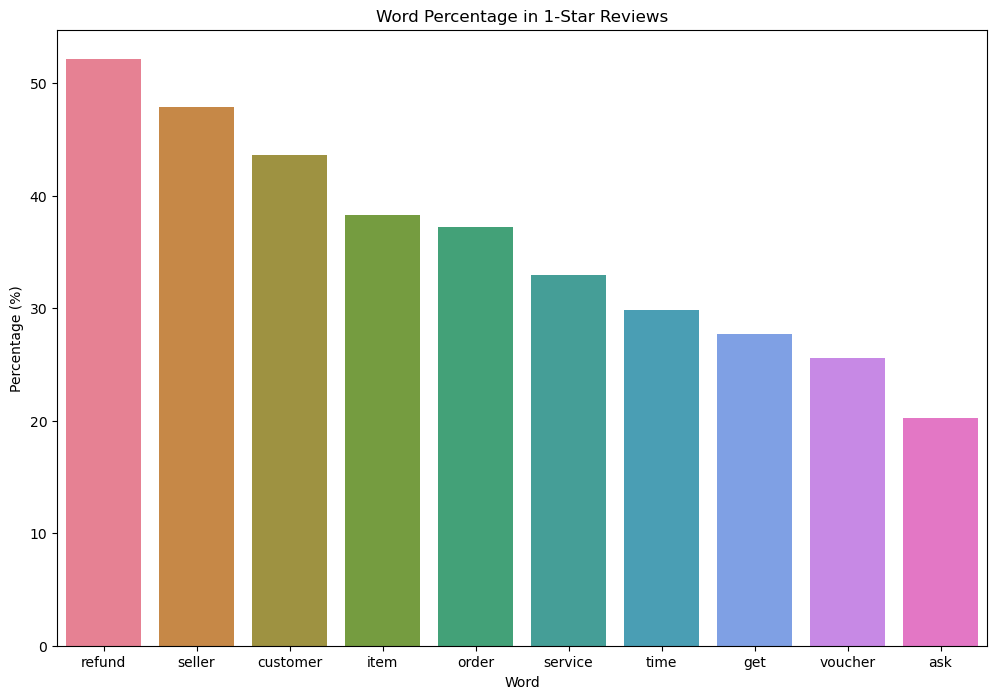

In [98]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_1_star, x='word', y='percentage(%)', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 1-Star Reviews')

# Display the plot
plt.show()

## Analysis on review with rating 2

In [10]:
rating_2 = df_2024[df_2024['rating'] == 2]
rating_2

,date,developerResponse,review,rating,isEdited,title,userName,year,month
2,2024-08-20 06:10:51,NaN,ever since buy platform go downhill previously...,2,False,Products and Customer Service,Agifrures,2024,8
21,2024-01-23 08:56:27,"{'id': 41522746, 'body': 'We apologize for the...",want create game user stay platform pls get ri...,2,False,Buggy games,"Egon, my hero",2024,1
25,2024-10-03 04:42:13,"{'id': 47229479, 'body': ""We appreciate your f...",require click access voucher centre second cli...,2,False,Poor UI designed to prioritise ads over good u...,dqwrtx,2024,10
45,2024-07-06 04:56:34,NaN,use year do not issue great cone process speci...,2,False,Issue with return processes,ps_992,2024,7
67,2024-10-10 00:12:42,NaN,interface show daily flash deal look totally d...,2,False,Inconsistent app interface,Ccorporate,2024,10
108,2024-05-31 05:37:24,"{'id': 44308711, 'body': 'Lazada xin lỗi vì sự...",seller could easily send bad quality item desc...,2,False,Bad refund policy.,0101kit0101,2024,5
155,2024-05-27 15:34:16,"{'id': 44223235, 'body': 'Lazada xin lỗi vì sự...",na,2,False,App keep asking for product rating which I fou...,huuthanhdlv,2024,5
174,2024-02-25 05:38:49,"{'id': 42235093, 'body': 'We apologize for any...",surf stuff notice make phone hot please someth...,2,False,App making IPhone 14 Pro Max hot,AidanDeSilvaa,2024,2
182,2024-05-17 06:39:06,"{'id': 43997070, 'body': 'Lazada xin lỗi vì sự...",need able copy paste thai word translate they,2,False,Language,Souniz,2024,5
204,2024-04-05 16:17:13,"{'id': 43094955, 'body': ""Thank you for postin...",good since give voucher expire day good,2,False,Not feel great,hosen SQ,2024,4


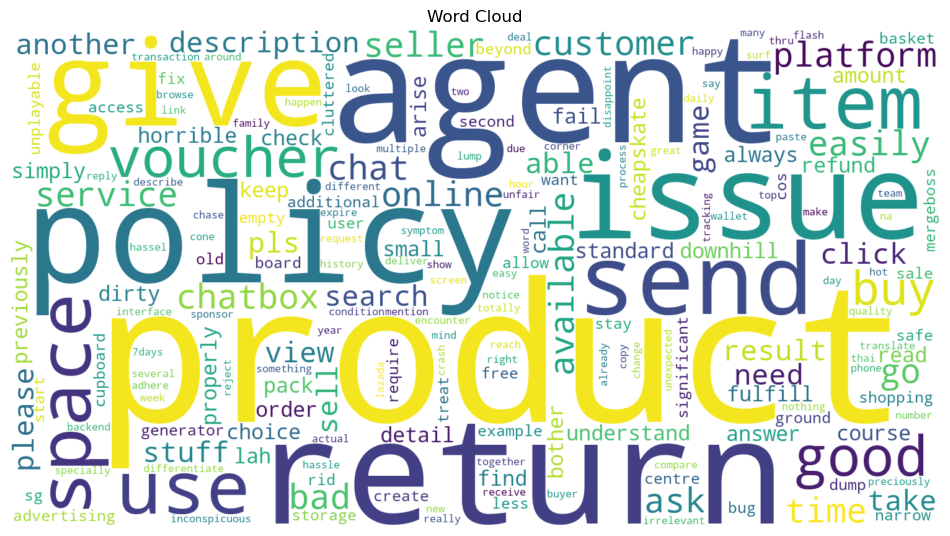

In [11]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_2['review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                      width=1500, height=800).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [101]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_2['review'])))

# Print the word counts
print(word_counts)

Counter({'get': 8, 'product': 7, 'agent': 4, 'return': 4, 'policy': 4, 'issue': 3, 'give': 3, 'send': 3, 'item': 3, 'use': 3, 'space': 3, 'voucher': 3, 'good': 3, 'since': 2, 'buy': 2, 'platform': 2, 'go': 2, 'easily': 2, 'customer': 2, 'service': 2, 'online': 2, 'chat': 2, 'chatbox': 2, 'time': 2, 'available': 2, 'seller': 2, 'ask': 2, 'bad': 2, 'description': 2, 'need': 2, 'game': 2, 'pls': 2, 'sell': 2, 'take': 2, 'stuff': 2, 'click': 2, 'another': 2, 'search': 2, 'result': 2, 'view': 2, 'please': 2, 'able': 2, 'ever': 1, 'downhill': 1, 'previously': 1, 'call': 1, 'horrible': 1, 'arise': 1, 'always': 1, 'standard': 1, 'answer': 1, 'simply': 1, 'understand': 1, 'read': 1, 'course': 1, 'find': 1, 'detail': 1, 'check': 1, 'lah': 1, 'choice': 1, 'dirty': 1, 'bother': 1, 'pack': 1, 'properly': 1, 'cheapskate': 1, 'small': 1, 'amount': 1, 'refund': 1, 'fail': 1, 'fulfill': 1, 'order': 1, 'keep': 1, 'advertising': 1, 'sale': 1, 'treat': 1, 'sg': 1, 'dump': 1, 'ground': 1, 'less': 1, 'safe'

In [102]:
# Access the first 10 words and their counts
first_10_words = word_counts.most_common(10)

# Print the first 20 words and their counts
print(first_10_words)

[('get', 8), ('product', 7), ('agent', 4), ('return', 4), ('policy', 4), ('issue', 3), ('give', 3), ('send', 3), ('item', 3), ('use', 3)]


In [103]:
# Count the total number of words present
total_words = rating_2.shape[0]

# Create a DataFrame from the subset_words list
df_2_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

# get the percentage of top 10 words across all 1 star review
df_2_star['percentage(%)'] = round(df_2_star['count'] * 100 / total_words,2)
df_2_star

,word,count,percentage(%)
0,get,8,57.14
1,product,7,50.00
2,agent,4,28.57
3,return,4,28.57
4,policy,4,28.57
5,issue,3,21.43
6,give,3,21.43
7,send,3,21.43
8,item,3,21.43
9,use,3,21.43


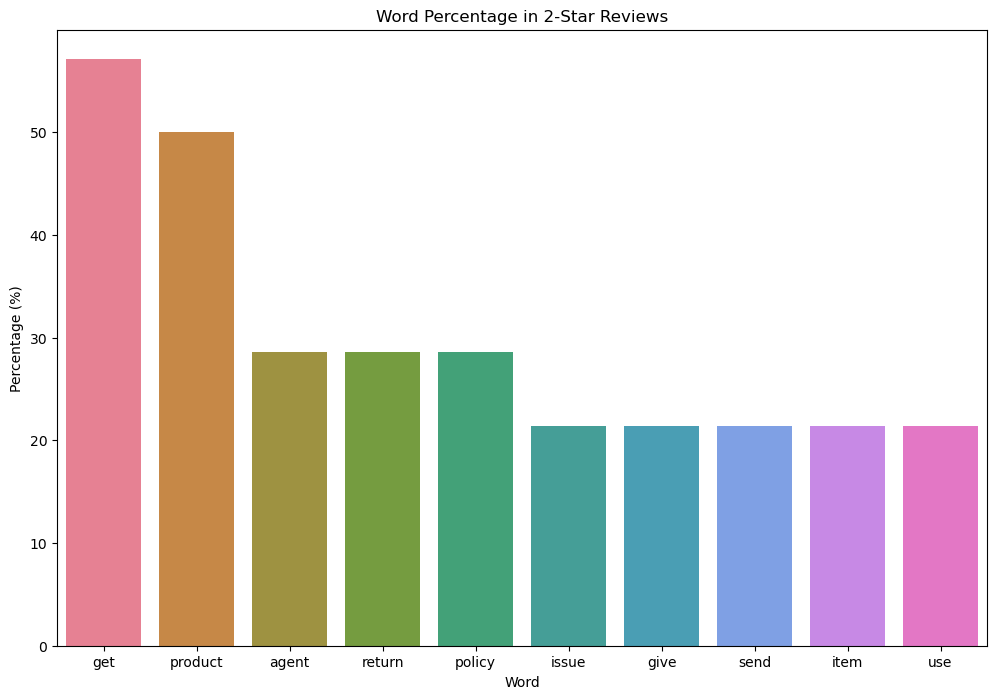

In [104]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_2_star, x='word', y='percentage(%)', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 2-Star Reviews')


# Display the plot
plt.show()

## Analysis on review with rating 3

In [12]:
rating_3 = df_2024[df_2024['rating'] == 3]
rating_3

,date,developerResponse,review,rating,isEdited,title,userName,year,month
39,2024-01-25 01:32:43,"{'id': 41576015, 'body': 'We apologize for the...",try log use facebook account new phone work st...,3,False,Can’t log in using Facebook account,Poisonwords,2024,1
71,2024-07-17 23:20:09,NaN,unable see daily voucher selection laz cash ch...,3,False,iPhone 15 pro max version having issue,Carelezz,2024,7
76,2024-07-17 14:01:09,NaN,vietnam version english language option often ...,3,False,English language patchy,Brant82,2024,7
78,2024-03-18 22:16:14,"{'id': 42716851, 'body': ""We apologize for the...",unable log facebook click button use facebook ...,3,False,Login,hejhdudgdhd,2024,3
100,2024-03-08 13:36:03,"{'id': 42474995, 'body': 'We apologize for the...",many daily notification get annoying well delete,3,False,Its a good app,WanShark69,2024,3
107,2024-10-22 05:38:59,NaN,can not listen headphone peacefully without me...,3,False,Intrusion video playback,mujiland,2024,10
134,2024-01-10 10:00:12,"{'id': 41269435, 'body': ""We apologize for the...",yes log redmart pain much easy combine lazda m...,3,False,Redmart,Mirijay,2024,1
168,2024-01-13 13:44:44,"{'id': 41286337, 'body': 'We apologize for the...",service good delivery poor action take inform ...,3,False,Good Service,202019,2024,1
242,2024-07-08 04:54:57,NaN,good,3,False,good,川野雄鹿队,2024,7
257,2024-05-18 11:24:37,"{'id': 44011854, 'body': 'Lazada xin lỗi vì sự...",late version introduce quite bit issue game cl...,3,False,Bugs in v7.51.0,aezjnn,2024,5


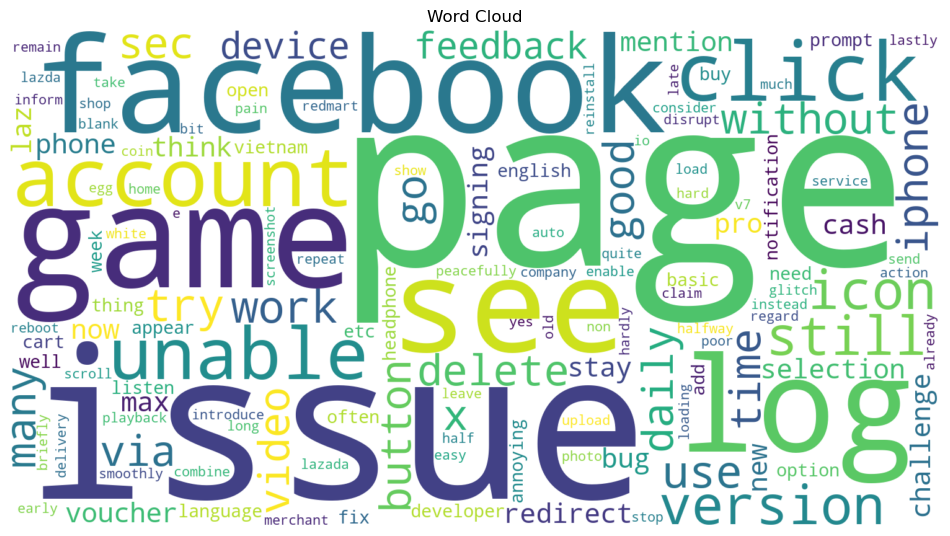

In [13]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_3['review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                      width=1500, height=800).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [107]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_3['review'])))

# Print the word counts
print(word_counts)

Counter({'page': 8, '>': 7, 'issue': 6, 'game': 6, 'log': 5, 'facebook': 5, 'see': 5, 'account': 4, 'click': 4, 'unable': 3, 'version': 3, 'still': 3, 'icon': 3, 'try': 2, 'use': 2, 'work': 2, 'without': 2, 'daily': 2, 'iphone': 2, 'via': 2, 'button': 2, 'many': 2, 'delete': 2, 'video': 2, 'good': 2, 'go': 2, 'time': 2, 'sec': 2, 'feedback': 2, 'device': 2, 'new': 1, 'phone': 1, 'stay': 1, 'redirect': 1, 'think': 1, 'bug': 1, 'now': 1, 'voucher': 1, 'selection': 1, 'laz': 1, 'cash': 1, 'challenge': 1, '15': 1, 'pro': 1, 'max': 1, 'signing': 1, 'xs': 1, 'mention': 1, 'developer': 1, 'need': 1, 'fix': 1, 'this': 1, 'vietnam': 1, 'english': 1, 'language': 1, 'option': 1, 'often': 1, 'basic': 1, 'thing': 1, 'like': 1, 'buy': 1, 'add': 1, 'cart': 1, 'etc': 1, 'open': 1, 'prompt': 1, 'appear': 1, 'week': 1, 'notification': 1, 'get': 1, 'annoying': 1, 'well': 1, 'can': 1, 'not': 1, 'listen': 1, 'headphone': 1, 'peacefully': 1, 'merchant': 1, 'disrupt': 1, 'auto': 1, 'playback': 1, 'hardly': 1

In [108]:
# Access the first 10 words and their counts
first_20_words = word_counts.most_common(20)

# Print the first 20 words and their counts
print(first_20_words)

[('page', 8), ('>', 7), ('issue', 6), ('game', 6), ('log', 5), ('facebook', 5), ('see', 5), ('account', 4), ('click', 4), ('unable', 3), ('version', 3), ('still', 3), ('icon', 3), ('try', 2), ('use', 2), ('work', 2), ('without', 2), ('daily', 2), ('iphone', 2), ('via', 2)]


In [109]:
selected_indices = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Use tuple comprehension to extract the values at those indices
first_10_words = tuple(first_20_words[i] for i in selected_indices)

first_10_words

(('page', 8),
 ('issue', 6),
 ('game', 6),
 ('log', 5),
 ('facebook', 5),
 ('see', 5),
 ('account', 4),
 ('click', 4),
 ('unable', 3),
 ('version', 3))

In [110]:
# Count the total number of words present
total_words = rating_3.shape[0]

# Create a DataFrame from the subset_words list
df_3_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

# get the percentage of top 10 words across all 1 star review
df_3_star['percentage(%)'] = round(df_3_star['count'] * 100 / total_words,2)
df_3_star

,word,count,percentage(%)
0,page,8,80.0
1,issue,6,60.0
2,game,6,60.0
3,log,5,50.0
4,facebook,5,50.0
5,see,5,50.0
6,account,4,40.0
7,click,4,40.0
8,unable,3,30.0
9,version,3,30.0


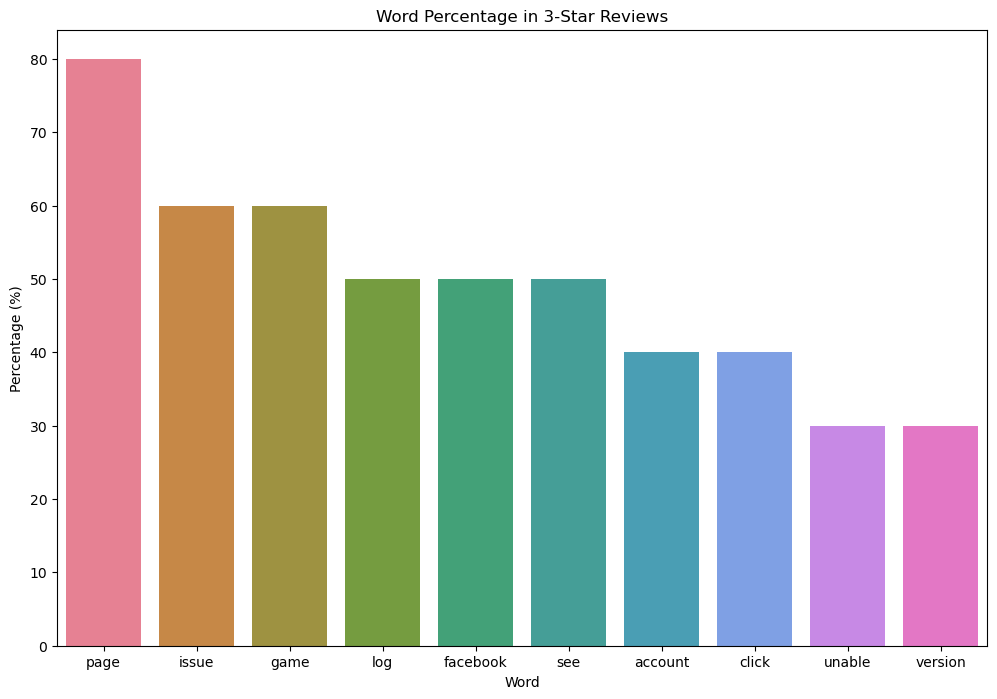

In [111]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_3_star, x='word', y='percentage(%)', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 3-Star Reviews')

# Display the plot
plt.show()

## Analysis of review with rating 4

In [14]:
rating_4 = df_2024[df_2024['rating'] == 4]
rating_4

,date,developerResponse,review,rating,isEdited,title,userName,year,month
7,2024-06-21 08:48:05,NaN,easy use clear description compare voucher har...,4,False,Good but can be improved,chmng,2024,6
32,2024-10-10 02:56:07,"{'id': 47390915, 'body': ""We appreciate your p...",auto discount voucher add except platform vouc...,4,False,"Fast & Reliable, awesome platform to buy.",Orange Saint,2024,10
35,2024-03-14 00:05:24,NaN,appreciate post day product review mean user u...,4,False,After 7 days Review,Sh3N88,2024,3
110,2024-06-07 05:49:20,"{'id': 44463396, 'body': 'We appreciate your f...",order easy place,4,False,Easy to order,Kuqier69,2024,6
144,2024-03-26 16:12:40,"{'id': 42950455, 'body': ""Hi Kenhelen! We're g...",easy browse good selection choose from,4,False,Amarone wine,Kenhelen,2024,3
146,2024-10-15 01:33:01,"{'id': 47501995, 'body': ""We appreciate your p...",easy payment fast hassle free,4,False,Easy payment and fast. Hassle free,cn750124,2024,10
180,2024-01-09 03:33:12,NaN,thank discount,4,False,Good and Easy to use App,Carryon417,2024,1
186,2024-03-21 12:18:49,NaN,hope free shipping remain forever,4,False,Happy shopping with free shipping,MerryYuen,2024,3
224,2024-09-12 03:09:47,"{'id': 46716094, 'body': 'We appreciate your p...",good,4,False,Rate,Chery tk,2024,9


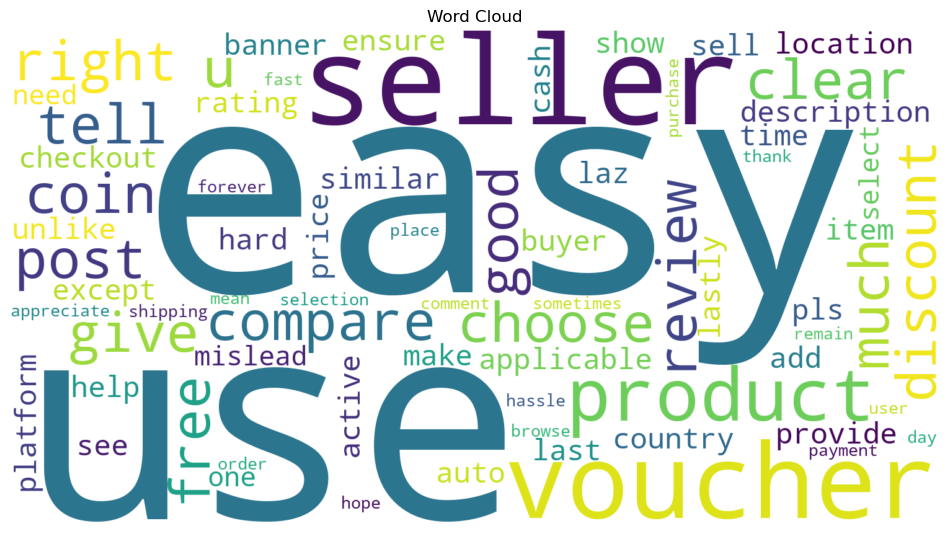

In [15]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_4['review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                      width=1500, height=800).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [114]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_4['review'])))

# Print the word counts
print(word_counts)

Counter({'easy': 6, 'use': 5, 'seller': 5, 'voucher': 4, 'product': 4, 'clear': 2, 'compare': 2, 'tell': 2, 'u': 2, 'give': 2, 'choose': 2, 'coin': 2, 'much': 2, 'discount': 2, 'right': 2, 'post': 2, 'review': 2, 'good': 2, 'free': 2, 'description': 1, 'hard': 1, 'checkout': 1, 'see': 1, 'applicable': 1, 'provide': 1, 'country': 1, 'location': 1, 'banner': 1, 'rating': 1, 'last': 1, 'active': 1, 'time': 1, 'make': 1, 'similar': 1, 'laz': 1, 'cash': 1, 'unlike': 1, 'auto': 1, 'add': 1, 'except': 1, 'platform': 1, 'lastly': 1, 'pls': 1, 'help': 1, 'buyer': 1, 'ensure': 1, 'show': 1, 'item': 1, 'sell': 1, 'price': 1, 'mislead': 1, 'need': 1, 'select': 1, 'one': 1, 'appreciate': 1, 'day': 1, 'mean': 1, 'user': 1, 'sometimes': 1, 'purchase': 1, 'comment': 1, 'order': 1, 'place': 1, 'browse': 1, 'selection': 1, 'from': 1, 'payment': 1, 'fast': 1, 'hassle': 1, 'thank': 1, 'hope': 1, 'shipping': 1, 'remain': 1, 'forever': 1})


In [115]:
# Access the first 10 words and their counts
first_10_words = word_counts.most_common(10)

# Print the first 20 words and their counts
print(first_10_words)

[('easy', 6), ('use', 5), ('seller', 5), ('voucher', 4), ('product', 4), ('clear', 2), ('compare', 2), ('tell', 2), ('u', 2), ('give', 2)]


In [116]:
# Count the total number of words present
total_words = rating_4.shape[0]

# Create a DataFrame from the subset_words list
df_4_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

# get the percentage of top 10 words across all 1 star review
df_4_star['percentage(%)'] = round(df_4_star['count'] * 100 / total_words,2)
df_4_star

,word,count,percentage(%)
0,easy,6,66.67
1,use,5,55.56
2,seller,5,55.56
3,voucher,4,44.44
4,product,4,44.44
5,clear,2,22.22
6,compare,2,22.22
7,tell,2,22.22
8,u,2,22.22
9,give,2,22.22


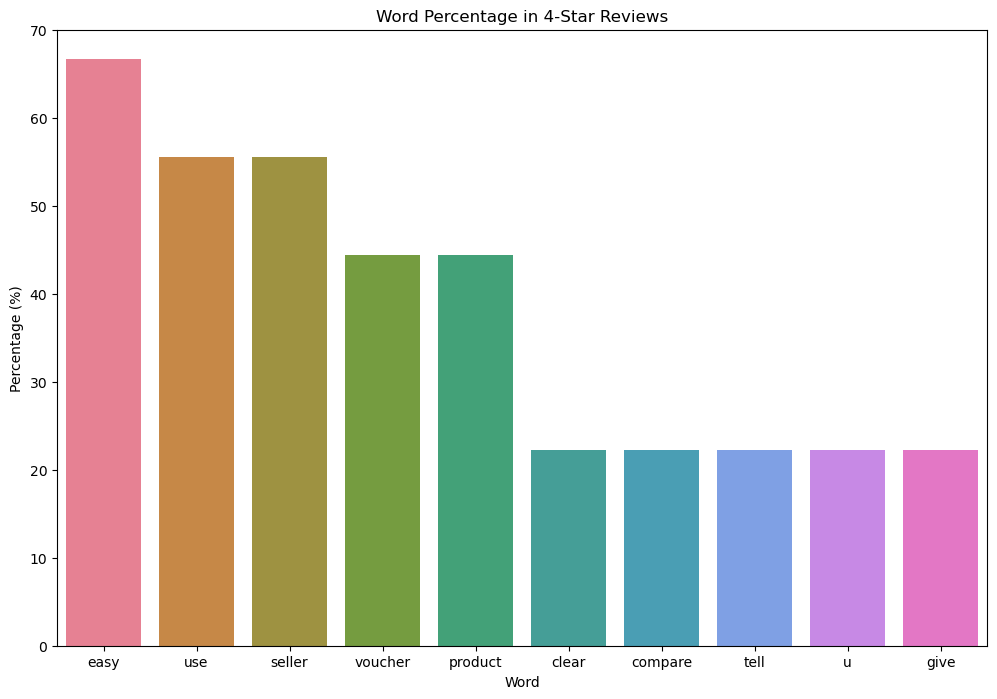

In [118]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_4_star, x='word', y='percentage(%)', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 4-Star Reviews')

# Display the plot
plt.show()

## Analysis on review with rating 5

In [16]:
rating_5 = df_2024[df_2024['rating'] == 5]
rating_5

,date,developerResponse,review,rating,isEdited,title,userName,year,month
1,2024-04-05 04:08:17,"{'id': 43111766, 'body': 'Hello 1Ace95, We are...",use year pleasure use must say thoroughly impr...,5,False,I enjoy buying stuff on Lazada 😍,1Ace95,2024,4
3,2024-10-22 07:53:06,"{'id': 47677372, 'body': ""We appreciate your w...",make many purchase extremely impressed entire ...,5,False,No other than Lazada👍🏼,Lustful_69,2024,10
11,2024-01-26 05:09:25,NaN,use shop recently increase shipping $ 49 $ 99 ...,5,False,"Shopee getting Greedier, Lazada still offers F...",Rave 3000,2024,1
14,2024-04-10 08:05:55,NaN,buy product plaform year find service trustwor...,5,False,Trustworthy and Reliable,JoshuaTSP,2024,4
15,2024-04-29 11:53:33,"{'id': 46913124, 'body': ""We appreciate your k...",customer service round experience far superior...,5,False,Customer Service,jerryhayle88,2024,4
...,...,...,...,...,...,...,...,...,...
250,2024-05-17 12:49:52,"{'id': 44135921, 'body': 'We appreciate your p...",nice,5,False,Excellent,被qi骗了,2024,5
251,2024-01-21 02:59:59,NaN,hỗ trợ xử lý đơn hàng giao không đúng và hoàn ...,5,False,Hỗ trợ xử lý đơn hàng giao không đúng và hoàn ...,hohoangnam,2024,1
253,2024-09-13 05:02:14,"{'id': 46731496, 'body': ""We appreciate your f...",tracking process bit unclear glad wait sale bu...,5,False,Gd job every x,Enhancer n lancet,2024,9
254,2024-08-20 14:10:50,NaN,nann ghetto mmm b mymnnt gnm gnu bb nm bnnn,5,False,The government is not ulggguubn by,04102486,2024,8


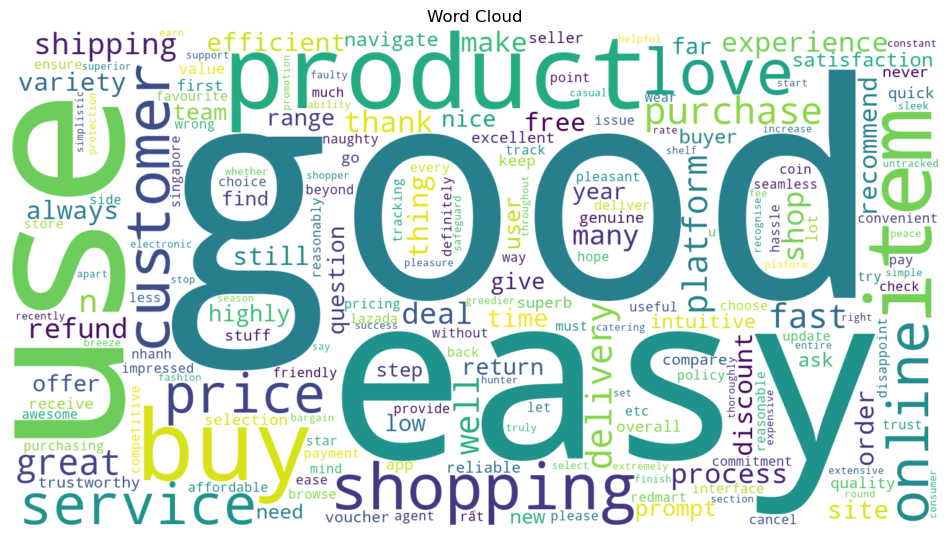

In [17]:
from wordcloud import WordCloud

# Concatenate all descriptions into a single string
text_cat = ' '.join(rating_5['review'].values)

# Generate the word cloud
wordcloud = WordCloud(max_font_size=None, background_color='white',collocations=False,
                       width=1500, height=800).generate(text_cat)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis("off")
plt.show()

In [18]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize the text and count occurrences of each word
word_counts = Counter(word_tokenize(' '.join(rating_5['review'])))

# Print the word counts
print(word_counts)

Counter({'good': 44, 'easy': 24, 'use': 18, 'product': 16, 'buy': 15, 'item': 13, 'shopping': 13, 'love': 13, 'customer': 12, 'service': 12, 'online': 12, 'price': 11, 'purchase': 11, 'delivery': 10, 'great': 10, 'platform': 9, 'fast': 9, 'well': 9, 'n': 8, 'shipping': 7, 'shop': 7, 'deal': 7, 'make': 6, 'experience': 6, 'many': 6, 'process': 6, 'get': 6, 'refund': 6, 'thank': 6, 'thing': 6, 'discount': 5, 'free': 5, 'recommend': 5, 'order': 5, 'still': 5, 'always': 5, 'time': 5, 'site': 5, 'variety': 5, 'year': 4, 'user': 4, 'range': 4, 'offer': 4, 'team': 4, 'prompt': 4, 'like': 4, 'question': 4, 'return': 4, 'highly': 4, 'give': 4, '$': 4, 'low': 4, 'far': 4, 'efficient': 4, 'ever': 4, 'nice': 4, 'intuitive': 3, 'need': 3, 'satisfaction': 3, 'new': 3, 'ask': 3, 'buyer': 3, 'navigate': 3, 'step': 3, 'find': 3, 'trustworthy': 3, 'reliable': 3, 'receive': 3, 'overall': 3, 'excellent': 3, 'genuine': 3, 'value': 3, 'never': 3, 'lot': 3, 'first': 3, 'compare': 3, 'quality': 3, 'quick': 3,

In [122]:
# Access the first 10 words and their counts
first_10_words = word_counts.most_common(10)

# Print the first 20 words and their counts
print(first_10_words)

[('good', 44), ('easy', 24), ('use', 18), ('product', 16), ('buy', 15), ('item', 13), ('shopping', 13), ('love', 13), ('customer', 12), ('service', 12)]


In [123]:
# Count the total number of words present
total_words = rating_5.shape[0]

# Create a DataFrame from the subset_words list
df_5_star = pd.DataFrame(first_10_words, columns=['word', 'count'])

# get the percentage of top 10 words across all 1 star review
df_5_star['percentage(%)'] = round(df_5_star['count'] * 100 / total_words,2)
df_5_star

,word,count,percentage(%)
0,good,44,31.65
1,easy,24,17.27
2,use,18,12.95
3,product,16,11.51
4,buy,15,10.79
5,item,13,9.35
6,shopping,13,9.35
7,love,13,9.35
8,customer,12,8.63
9,service,12,8.63


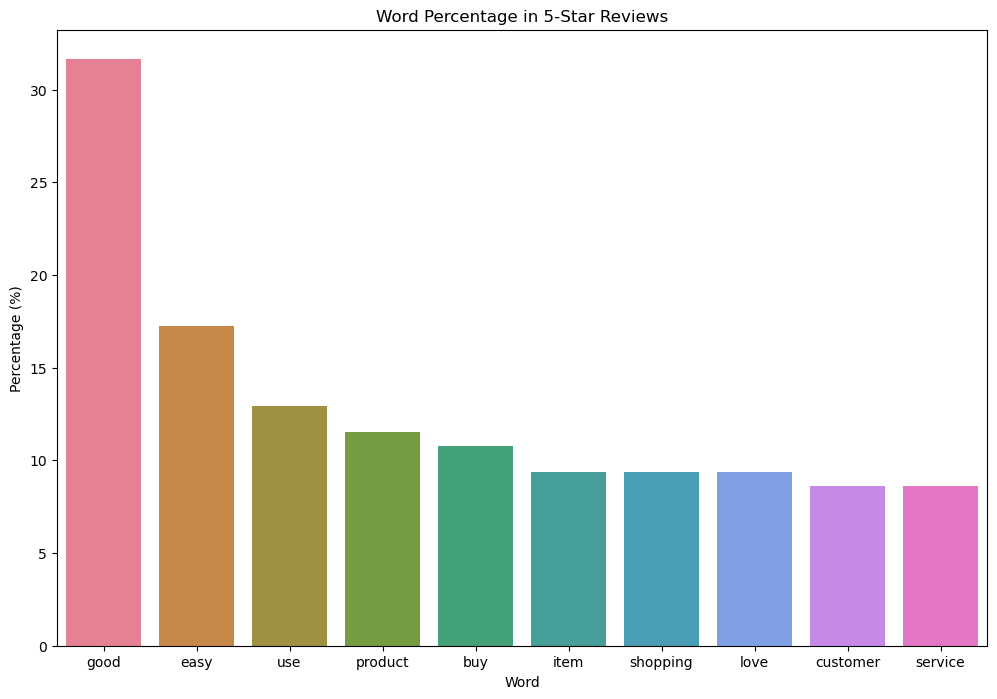

In [125]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Use the `palette` argument to assign different colors to each bar
sns.barplot(data=df_5_star, x='word', y='percentage(%)', palette="husl")  # 'husl' generates unique colors

# Set plot labels and title
plt.xlabel('Word')
plt.ylabel('Percentage (%)')
plt.title('Word Percentage in 5-Star Reviews')

# Display the plot
plt.show()

# Topic Modeling for reviews with rating <= 3 for most recent 3 months

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from pprint import pprint

df = pd.read_csv("lazada-app-reviews.csv")
df_2024 = df[df['date'] >= '2024']

In [2]:
# Gensim (Topic Modeling Pacakge)
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within','lazada','app','1','2','3','4','5','6','7','8','9','10','shopee','even'])

In [3]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 2 to 5243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               266 non-null    object
 1   developerResponse  163 non-null    object
 2   review             266 non-null    object
 3   rating             266 non-null    int64 
 4   isEdited           266 non-null    bool  
 5   title              266 non-null    object
 6   userName           266 non-null    object
 7   year               266 non-null    int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 16.9+ KB


In [4]:
df = df_2024[(df_2024['rating'] <= 3) & (df_2024['date'] >= "2024-08")].reset_index().copy()

In [5]:
df.rating.value_counts()

rating
1    30
2     4
3     1
Name: count, dtype: int64

In [6]:
df.review[4]

'Seriously I don’t know what is wrong with lazada system. Now I don’t even see the free shipping voucher at voucher page?! Most online platforms are giving free shipping vouchers easily or free collection point but why only for lazada there is no free shipping voucher to claim at all and I cannot see it at the voucher page? If there isn’t free shipping voucher able to claim and use, I will not purchase from lazada anymore. It is not worthwhile to buy from an online platform that does not even give free shipping vouchers.'

In [7]:
# Convert to list
data = df.review.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data[4:5])

['Seriously I don’t know what is wrong with lazada system. Now I don’t even see the free shipping voucher at voucher page?! Most online platforms are giving free shipping vouchers easily or free collection point but why only for lazada there is no free shipping voucher to claim at all and I cannot see it at the voucher page? If there isn’t free shipping voucher able to claim and use, I will not purchase from lazada anymore. It is not worthwhile to buy from an online platform that does not even give free shipping vouchers.']


In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[4])

['seriously', 'don', 'know', 'what', 'is', 'wrong', 'with', 'lazada', 'system', 'now', 'don', 'even', 'see', 'the', 'free', 'shipping', 'voucher', 'at', 'voucher', 'page', 'most', 'online', 'platforms', 'are', 'giving', 'free', 'shipping', 'vouchers', 'easily', 'or', 'free', 'collection', 'point', 'but', 'why', 'only', 'for', 'lazada', 'there', 'is', 'no', 'free', 'shipping', 'voucher', 'to', 'claim', 'at', 'all', 'and', 'cannot', 'see', 'it', 'at', 'the', 'voucher', 'page', 'if', 'there', 'isn', 'free', 'shipping', 'voucher', 'able', 'to', 'claim', 'and', 'use', 'will', 'not', 'purchase', 'from', 'lazada', 'anymore', 'it', 'is', 'not', 'worthwhile', 'to', 'buy', 'from', 'an', 'online', 'platform', 'that', 'does', 'not', 'even', 'give', 'free', 'shipping', 'vouchers']


In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=5)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[4]]])

['seriously', 'don', 'know', 'what', 'is', 'wrong', 'with', 'lazada', 'system', 'now', 'don', 'even', 'see', 'the', 'free_shipping', 'voucher', 'at', 'voucher_page', 'most', 'online', 'platforms', 'are', 'giving', 'free_shipping', 'vouchers', 'easily', 'or', 'free', 'collection', 'point', 'but', 'why', 'only', 'for', 'lazada', 'there', 'is', 'no', 'free_shipping', 'voucher', 'to', 'claim', 'at_all', 'and', 'cannot', 'see', 'it', 'at', 'the', 'voucher_page', 'if', 'there', 'isn', 'free_shipping', 'voucher', 'able_to', 'claim', 'and', 'use', 'will', 'not', 'purchase', 'from', 'lazada', 'anymore', 'it', 'is', 'not', 'worthwhile', 'to', 'buy', 'from', 'an', 'online', 'platform', 'that', 'does', 'not', 'even', 'give', 'free_shipping', 'vouchers']


In [10]:
'''
The bigrams model is ready. Let’s define the functions to remove the stopwords, 
make bigrams and lemmatization and call them sequentially.
'''
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
'''
Let’s call the functions in order.
'''
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

'''
If it reports error "Can't find model 'en'. It doesn't seem to be a shortcut link, 
a Python package or a valid path to a data directory", you need to do following in command line:

> python -m spacy download en

It works only if you have administrator rights as the installation folder needs that. Otherwise
you will receive error "Download successful but linking failed. Creating a shortcut link for 'en' 
didn't work (maybe you don't have admin permissions?), but you can still load the model via its 
full package name: nlp = spacy.load('en_core_web_sm')". It may not work even you do as suggested.
In such case, you need to open Anadaconda's cmd prompt as an Administrator:

1. Right clik on the Anaconda Promt Icon
2. Go to "More" and click on "Open as Administrator"
3. Then type: python -m spacy download en
'''

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[4])

['seriously', 'know', 'wrong', 'system', 'see', 'free_shippe', 'voucher', 'voucher_page', 'online', 'platform', 'give', 'free_shippe', 'voucher', 'easily', 'free', 'collection', 'point', 'free_shippe', 'voucher', 'claim', 'see', 'voucher_page', 'free_shipping', 'voucher', 'able', 'claim', 'purchase', 'anymore', 'buy', 'online', 'platform', 'give', 'free_shippe', 'voucher']


In [12]:
'''
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.
Let’s create them.
'''
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[4:5])

[[(10, 1), (22, 1), (28, 2), (37, 2), (40, 2), (117, 1), (130, 1), (131, 1), (142, 1), (151, 1), (152, 2), (153, 1), (154, 1), (155, 4), (156, 1), (157, 1), (158, 2), (159, 1), (160, 1), (161, 5), (162, 2)]]


In [16]:
'''
We have everything required to train the LDA model.
In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics.
According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk.

update_every determines how often the model parameters should be updated and 
passes is the total number of training passes.
'''
'''
We have everything required to train the LDA model.
In addition to the corpus and dictionary, you need to provide the number of topics as well.

Apart from that, alpha and eta are hyperparameters that affect sparsity of the topics.
According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk.

update_every determines how often the model parameters should be updated and 
passes is the total number of training passes.
'''
# Build LDA model
import gensim
from gensim.models.coherencemodel import CoherenceModel

# Define the function to train LDA models with different numbers of topics
def test_lda_models(corpus, id2word, data_lemmatized, topic_range, passes=25, random_state=100):
    results = []

    for num_topics in topic_range:
        # Train the LDA model
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus=corpus,
            id2word=id2word,
            num_topics=num_topics,
            random_state=random_state,
            update_every=1,
            passes=passes,
            alpha=0.01,
            eta=0.01,
            per_word_topics=True
        )

        # Compute Perplexity
        perplexity = lda_model.log_perplexity(corpus)

        # Compute Coherence Score
        coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()

        # Append results
        results.append({
            'num_topics': num_topics,
            'perplexity': perplexity,
            'coherence_score': coherence_score
        })

        # Print the results for the current model
        print(f'Number of Topics: {num_topics}, Perplexity: {perplexity:.4f}, Coherence Score: {coherence_score:.4f}')

    return results

# Define the range of topics you want to test
topic_range = range(3, 16, 1)  # Example: Test from 5 to 20 topics, in steps of 2

# Run the function and collect results
results = test_lda_models(corpus=corpus, id2word=id2word, data_lemmatized=data_lemmatized, topic_range=topic_range)
results_df = pd.DataFrame(results)

Number of Topics: 3, Perplexity: -7.5598, Coherence Score: 0.4072
Number of Topics: 4, Perplexity: -7.4910, Coherence Score: 0.3891
Number of Topics: 5, Perplexity: -7.4363, Coherence Score: 0.3680
Number of Topics: 6, Perplexity: -7.3616, Coherence Score: 0.3695
Number of Topics: 7, Perplexity: -7.3402, Coherence Score: 0.3647
Number of Topics: 8, Perplexity: -7.2153, Coherence Score: 0.3138
Number of Topics: 9, Perplexity: -7.1829, Coherence Score: 0.3662
Number of Topics: 10, Perplexity: -7.2046, Coherence Score: 0.5800
Number of Topics: 11, Perplexity: -7.2477, Coherence Score: 0.3983
Number of Topics: 12, Perplexity: -7.2584, Coherence Score: 0.5623
Number of Topics: 13, Perplexity: -7.1237, Coherence Score: 0.4697
Number of Topics: 14, Perplexity: -7.1399, Coherence Score: 0.4257
Number of Topics: 15, Perplexity: -7.1881, Coherence Score: 0.4064


In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           passes=25,
                                           alpha=0.01,
                                            eta=0.01,
                                           per_word_topics=True)

In [15]:
# Display the topics
topics = lda_model.show_topics(num_topics=12, num_words=10, formatted=False)

# Print the topics in a readable format
print("Topics found via LDA:\n")
for idx, topic in topics:
    print(f"Topic #{idx+1}:")
    print(" ".join([word for word, _ in topic]))
    print()

Topics found via LDA:

Topic #1:
voucher free_shippe customer refund platform voucher_page see claim online give

Topic #2:
log able team ask item go suddenly fail back whole

Topic #3:
seller order agent item ask product say customer_service get keep

Topic #4:
never make check money demand back refund time million monie

Topic #5:
refund fake try seller help message clear read click refuse

Topic #6:
new phone number view search click result wrong buy bother

Topic #7:
popup shopping focused update regard potentially team user forward ve

Topic #8:
card bank voucher know help give system show get different

Topic #9:
voucher voucher_page use miss extremely item scam many buggy disrupt

Topic #10:
refund process seller ask order wrong cancel day date platform



### Topic #0: Voucher & Refund Issues
Main Idea: This topic is about complaints related to voucher problems, such as issues with free shipping, refunds, and the process of claiming online vouchers. Users are experiencing frustration with the voucher page, their ability to claim or use vouchers, and the overall platform handling of these claims.
### Topic #1: App/System Failures
Main Idea: Complaints about the app or platform failing unexpectedly. This topic highlights issues such as logging in, system crashes, or unexpected failures that prevent users from completing tasks, like ordering items, and the platform’s inability to recover properly.
### Topic #2: Seller & Product Issues
Main Idea: Reviews referring to issues with sellers, orders, and customer service. Users are frustrated with delayed responses, product issues, and the quality of service they receive from sellers or agents. There are also mentions of difficulties in tracking items and handling product-related queries.
### Topic #3: Refund Demands & Money Issues
Main Idea: Users demand refunds for faulty products or services, expressing dissatisfaction with the refund process. There’s mention of money disputes, including the frustration of not receiving money back on time or for an unjustified claim.
### Topic #4: Fake Products & Refund Refusals
Main Idea: Complaints about fake products and refused refunds. Customers feel they’ve been misled by sellers, and when they try to get a refund, they face obstacles, such as unclear messages, difficulties in clicking or processing the request, or sellers refusing to help.
### Topic #5: Phone & Account Issues
Main Idea: Issues with entering or updating phone numbers, incorrect search results, and problems related to buying products. Customers mention receiving wrong information or being bothered by problems related to their phone numbers or login issues.
### Topic #6: Pop-up & Shopping Experience
Main Idea: Complaints about pop-ups and annoying interruptions during the shopping experience. This includes frustration with notifications, updates, and the overall shopping experience being disrupted by unexpected pop-ups or excessive promotions.
### Topic #7: Payment & Card Issues
Main Idea: Complaints regarding bank cards, payment systems, and voucher issues related to purchases. Customers report issues with card payments, incorrect transactions, or issues where they didn’t get the voucher benefits as expected.
### Topic #8: Voucher Misses & Scams
Main Idea: This topic focuses on complaints about missing vouchers, issues with voucher pages, and frustrations with scams or buggy systems. Customers mention vouchers not being applied correctly, or they feel they’ve been misled by the platform.
### Topic #9: Refund Process & Order Problems
Main Idea: Problems with refund processing and order issues. Customers report incorrect orders, cancellations, and the difficulty in getting refunds for orders that went wrong, with some even mentioning that the process takes too long.

In [89]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.074*"voucher" + 0.049*"free_shippe" + 0.049*"customer" + 0.037*"refund" + '
  '0.025*"platform" + 0.025*"voucher_page" + 0.025*"see" + 0.025*"claim" + '
  '0.025*"online" + 0.025*"give"'),
 (1,
  '0.051*"log" + 0.034*"able" + 0.034*"team" + 0.017*"ask" + 0.017*"item" + '
  '0.017*"go" + 0.017*"suddenly" + 0.017*"fail" + 0.017*"back" + '
  '0.017*"whole"'),
 (2,
  '0.048*"seller" + 0.037*"order" + 0.026*"agent" + 0.026*"item" + 0.022*"ask" '
  '+ 0.018*"product" + 0.018*"say" + 0.018*"customer_service" + 0.015*"get" + '
  '0.015*"keep"'),
 (3,
  '0.091*"never" + 0.061*"make" + 0.061*"check" + 0.061*"money" + '
  '0.061*"demand" + 0.061*"back" + 0.030*"refund" + 0.030*"time" + '
  '0.030*"million" + 0.030*"monie"'),
 (4,
  '0.050*"refund" + 0.033*"fake" + 0.033*"try" + 0.033*"seller" + 0.033*"help" '
  '+ 0.033*"message" + 0.033*"clear" + 0.033*"read" + 0.033*"click" + '
  '0.033*"refuse"'),
 (5,
  '0.056*"new" + 0.042*"phone" + 0.028*"number" + 0.028*"view" + '
  '0.028*"searc

In [90]:
'''
Model perplexity and topic coherence provide a convenient measure to judge 
how good a given topic model is. In my experience, topic coherence score, 
in particular, has been more helpful.
'''
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.204624035395682

Coherence Score:  0.5799585751836744


In [91]:
'''
Now that the LDA model is built, the next step is to examine the produced 
topics and the associated keywords. There is no better tool than pyLDAvis package’s 
interactive chart and is designed to work well with jupyter notebooks.
'''
import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

In [92]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.149820 -0.059461       1        1  33.792861
9      0.228906 -0.008994       2        1  15.877057
0      0.006193  0.204927       3        1   9.714684
5      0.026696 -0.089338       4        1   8.578367
4      0.198242  0.047155       5        1   7.075622
1     -0.128682 -0.065705       6        1   6.949366
8     -0.196533  0.147681       7        1   5.067977
6     -0.215469 -0.225553       8        1   4.941775
7     -0.095065  0.219677       9        1   4.310692
3      0.025893 -0.170389      10        1   3.691600, topic_info=         Term       Freq      Total Category  logprob  loglift
161   voucher  12.000000  12.000000  Default  30.0000  30.0000
250     never   4.000000   4.000000  Default  29.0000  29.0000
48     seller  18.000000  18.000000  Default  28.0000  28.0000
45     refund  14.000000  14.000000  Default  27.0000  27.0000
64   customer   5.000000   5.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
6         ask   0.008933  11.738780  Topic10  -8.0934  -3.8818
298     clear   0.008927   1.956962  Topic10  -8.0941  -2.0910
161   voucher   0.008925  12.175138  Topic10  -8.0944  -3.9192
176    result   0.008923   1.976878  Topic10  -8.0946  -2.1015
94    backend   0.008922   1.990117  Topic10  -8.0947  -2.1083

[450 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
131       1  0.389356     able
131       3  0.129785     able
131       4  0.129785     able
131       6  0.259570     able
131       7  0.129785     able
...     ...       ...      ...
129       6  0.257171     work
229       2  0.944011  working
130       2  0.515084    wrong
130       3  0.171695    wrong
130       4  0.343389    wrong

[473 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 1, 6, 5, 2, 9, 7, 8, 4])

In [93]:
pyLDAvis.save_html(vis, 'lda_topics_visualization.html')